In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np

In [5]:
%load_ext autoreload
%autoreload 2
from echolens.quest import CMBbharatQE
from echolens.utils import cli

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
folder = '/pscratch/sd/l/lonappan/ECHOLENS'
fg_model = ['d0','s0']
nside = 1024
inc_fg= False
lmin_cmb = 10
lmax_cmb = 3000
lmax_recon = 2048
ilc_bin = 50
cache = True
inc_isw = False
mask_apo_scale = 2


In [4]:
qe = CMBbharatQE(folder,nside,fg_model,lmin_cmb,lmax_cmb,lmax_recon,0.8,inc_fg,ilc_bin,inc_isw,cache,mask_apo_scale)

/global/u2/l/lonappan/softwares/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


Caching sky fractions...


In [6]:
qlm = qe.get_unnormalized_qe(0)
qresp = qe.qresp.get_response('p_p','p')
qnorm = cli(qresp)
n0 = qe.nhl.get_sim_nhl(0,'p_p','p_p')

In [28]:
ell = np.arange(0,2048)
w = lambda ell : ell ** 2 * (ell + 1.) ** 2 * 0.5 / np.pi * 1e7

In [29]:
qcl = hp.alm2cl(qlm)[ell] * w(ell) * qnorm[ell]**2 / qe.qlms.fsky12
ncl = n0[ell] * w(ell) * qnorm[ell]**2

In [30]:
input = qe.get_input_phi(0)
input_cl = hp.alm2cl(input)[ell] * w(ell)

In [31]:
inpXrec = qe.cross_spectra(0)

(2, 2048)

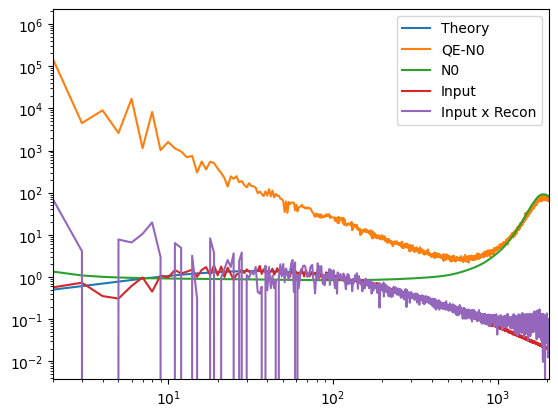

In [34]:
plt.loglog(ell,qe.cl_pp[ell]*w(ell),label='Theory')
plt.loglog(ell,qcl-ncl,label='QE-N0')
plt.loglog(ell,ncl,label='N0')
plt.loglog(ell,input_cl,label='Input')
plt.loglog(ell,inpXrec[ell]*w(ell),label='Input x Recon')
plt.legend()
plt.xlim(2,2048)